In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from arch import arch_model
from arch.unitroot import ADF
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import acorr_ljungbox  
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [2]:
aud = pd.read_csv('/Users/klaus_zhangjt/Desktop/quant/FX/FX_TRI/AUD_v2.csv')
aud['tri'] = aud.tri.values + 50
aud['log_return'] = aud['tri'].apply(np.log).diff()
aud.dropna(how='any', inplace=True)
log_return = aud['log_return'].values
train_test_split = aud[aud.timestamp.str.contains('2019')].index[-1] + 1
train = log_return[:train_test_split]
test = log_return[train_test_split:]

In [3]:
arima_model = ARIMA(train, order=(5, 0, 5))
arima_result = arima_model.fit()

garch_model = arch_model(arima_result.resid*100, mean='Zero', vol="GARCH", p=1, q=1)
garch_result = garch_model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 366147213.8960465
Iteration:      2,   Func. Count:     10,   Neg. LLF: 11763.126119537887
Iteration:      3,   Func. Count:     15,   Neg. LLF: 9455.352507335956
Iteration:      4,   Func. Count:     19,   Neg. LLF: 21229.247633959712
Iteration:      5,   Func. Count:     24,   Neg. LLF: 17959.714885372636
Iteration:      6,   Func. Count:     29,   Neg. LLF: 37093.769028612616
Iteration:      7,   Func. Count:     34,   Neg. LLF: 10383.098244765928
Iteration:      8,   Func. Count:     39,   Neg. LLF: 9408.6703234765
Iteration:      9,   Func. Count:     44,   Neg. LLF: 9260.19962404397
Iteration:     10,   Func. Count:     49,   Neg. LLF: 9211.274020739114
Iteration:     11,   Func. Count:     54,   Neg. LLF: 9208.795904974448
Iteration:     12,   Func. Count:     58,   Neg. LLF: 9208.755602761172
Iteration:     13,   Func. Count:     62,   Neg. LLF: 9208.755408566984
Iteration:     14,   Func. Count:     66,   Neg. LLF: 9208.755

In [4]:
print(garch_result.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -9208.76
Distribution:                  Normal   AIC:                           18423.5
Method:            Maximum Likelihood   BIC:                           18443.6
                                        No. Observations:                 5945
Date:                Wed, May 03 2023   Df Residuals:                     5945
Time:                        19:35:19   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.5199e-03  9.108e-04      2.767  5.661e-03 [7.

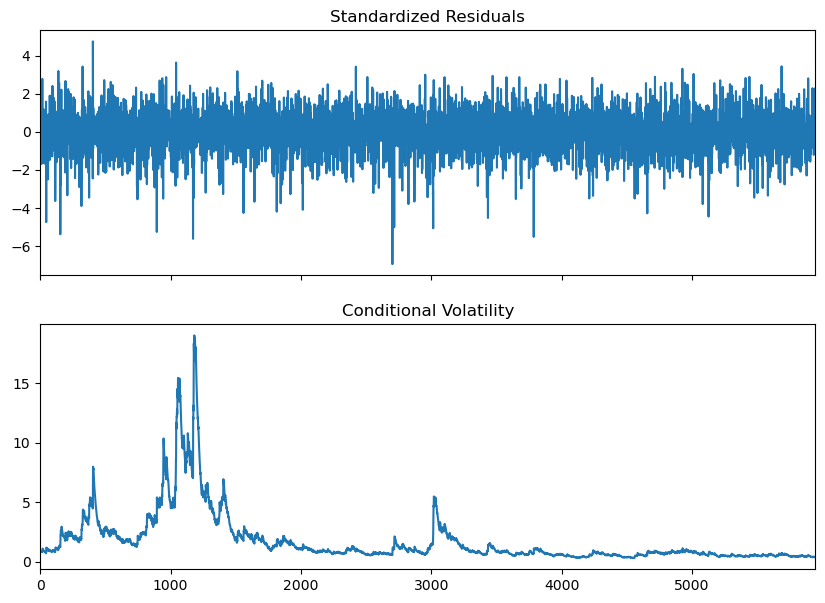

In [5]:
plt.rc("figure", figsize=(10, 7))
garch_result.plot()
plt.show()

In [19]:
std_resdial = (garch_result.resid - np.mean(garch_result.resid)) / np.std(garch_result.resid)

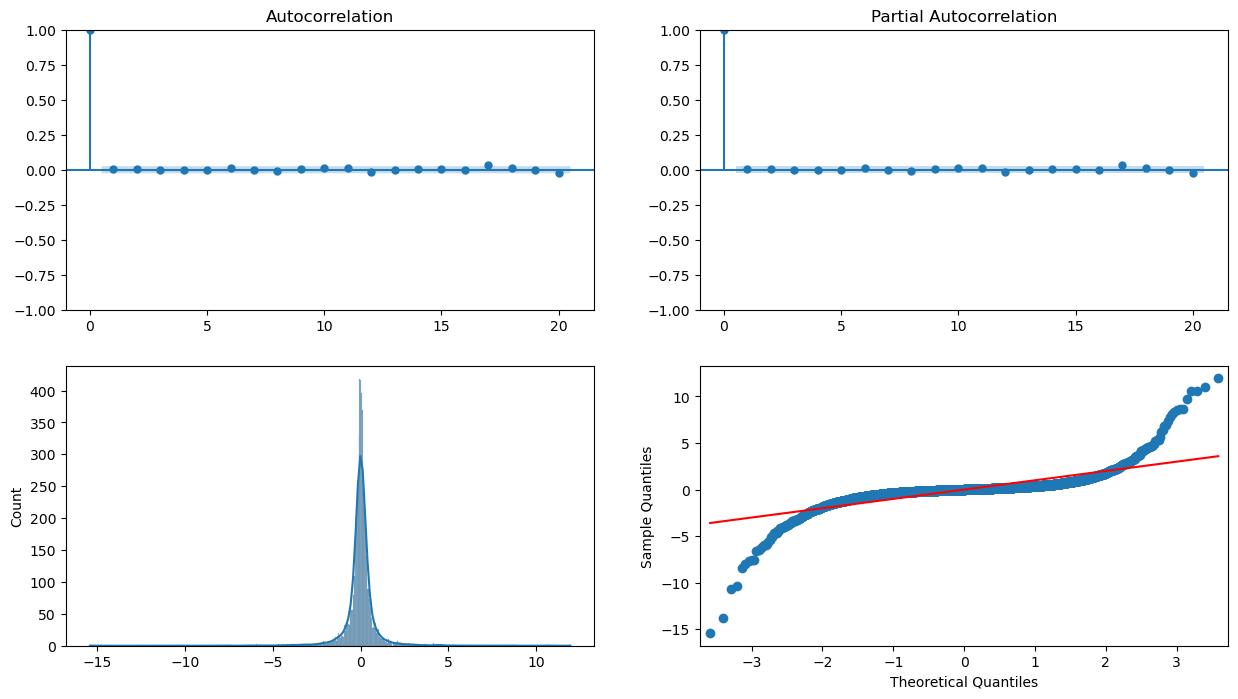

In [25]:
fig, axes = plt.subplots(2,2,figsize=(15,8))
sm.graphics.tsa.plot_acf(std_resdial, lags=20, ax=axes[0][0])
sm.graphics.tsa.plot_pacf(std_resdial, lags=20, ax=axes[0][1], method='ywm')
sns.histplot(std_resdial, kde=True, ax=axes[1][0])
qqplot(std_resdial, line='s', ax=axes[1][1])
plt.show()

In [27]:
acorr_ljungbox(std_resdial, lags=[i for i in range(1,21)])

,lb_stat,lb_pvalue
1,0.235009,0.627835
2,0.592110,0.743747
3,0.593039,0.898024
4,0.606570,0.962331
5,0.608002,0.987634
6,1.785471,0.938334
7,1.907345,0.964790
8,2.679340,0.952843
9,2.700101,0.975009
10,3.220838,0.975739


In [30]:
from scipy.stats import kstest
kstest(std_resdial, cdf = "norm")

KstestResult(statistic=0.20053327811080682, pvalue=5.013535579017858e-210)

In [6]:
arch_model = arch_model(arima_result.resid*100, mean='Zero', vol="ARCH", p=1)
arch_result = arch_model.fit()

Iteration:      1,   Func. Count:      4,   Neg. LLF: 18952.475465486852
Iteration:      2,   Func. Count:     11,   Neg. LLF: 12555.825119821953
Iteration:      3,   Func. Count:     14,   Neg. LLF: 12563.700942566462
Iteration:      4,   Func. Count:     18,   Neg. LLF: 12555.540414033865
Iteration:      5,   Func. Count:     21,   Neg. LLF: 12555.540410129233
Iteration:      6,   Func. Count:     23,   Neg. LLF: 12555.540414982781
Optimization terminated successfully    (Exit mode 0)
            Current function value: 12555.540410129233
            Iterations: 6
            Function evaluations: 23
            Gradient evaluations: 6


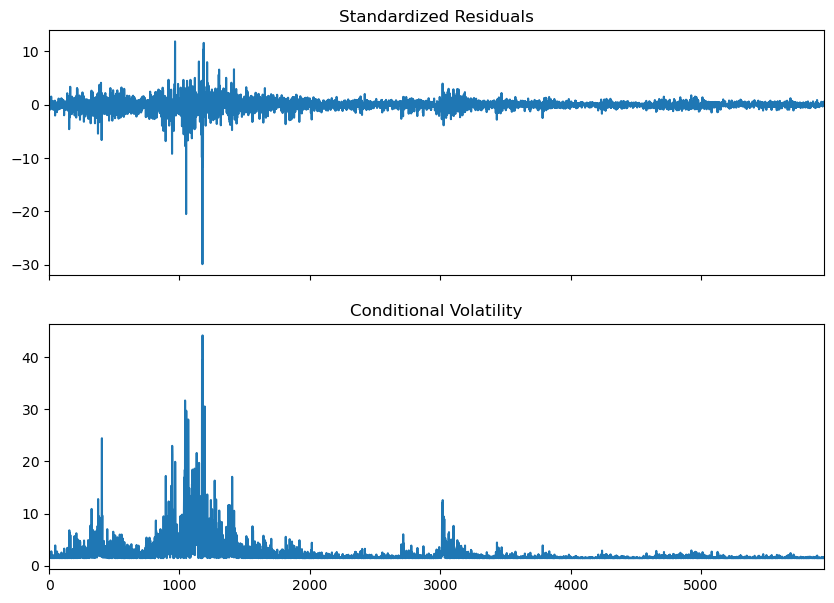

In [8]:
plt.rc("figure", figsize=(10, 7))
arch_result.plot()
plt.show()

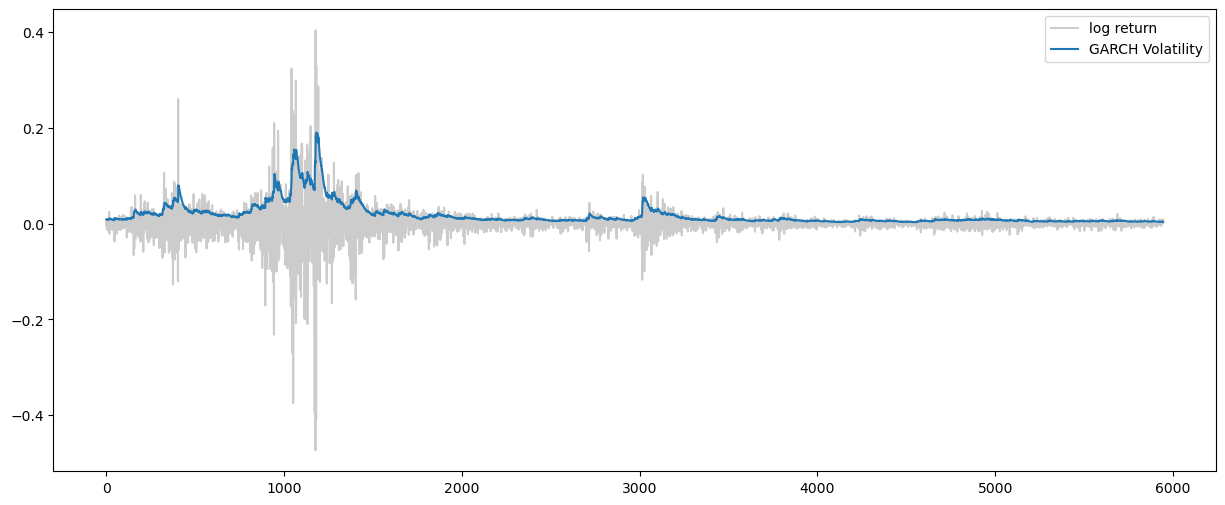

In [10]:
plt.rc("figure", figsize=(15, 6))
gm_vol = garch_result.conditional_volatility/100
plt.plot(train, color = 'grey', label = 'log return', alpha = 0.4)
# plt.plot(arch_result.conditional_volatility/100, label = 'ARCH Volatility')
plt.plot(gm_vol, label = 'GARCH Volatility')
plt.legend(loc = 'upper right')
plt.show()